<a href="https://colab.research.google.com/github/HarshitGupta1511/Fake-Job-Detection/blob/main/fake_job_posting_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('/fake_job_postings.csv')


In [ ]:
print(df.head())
print(df.info())
print(df.isnull().sum())  # Checking for missing values

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
# Dropping unnecessary columns (Modify based on dataset understanding)
df.drop(['job_id'], axis=1, inplace=True, errors='ignore')

In [ ]:
# Handling missing values by filling with empty string
df.fillna("", inplace=True)


In [ ]:
# Encoding the target variable
label_encoder = LabelEncoder()
df['fraudulent'] = label_encoder.fit_transform(df['fraudulent'])

In [ ]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df['text'] = df[text_columns].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df['text']).toarray()

In [ ]:
X = X_text  # Using only text features for simplicity
y = df['fraudulent']

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'\n{name} Results:')
    print('Accuracy:', acc)
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.9711968680089486
Confusion Matrix:
 [[3395    0]
 [ 103   78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       1.00      0.43      0.60       181

    accuracy                           0.97      3576
   macro avg       0.99      0.72      0.79      3576
weighted avg       0.97      0.97      0.97      3576


Random Forest Results:
Accuracy: 0.9798657718120806
Confusion Matrix:
 [[3395    0]
 [  72  109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.60      0.75       181

    accuracy                           0.98      3576
   macro avg       0.99      0.80      0.87      3576
weighted avg       0.98      0.98      0.98      3576


KNN Results:
Accuracy: 0.9798657718120806
Confusion Matrix:
 [[3381   14]
 [  58  123]]
Class

In [ ]:
# All models performed exceptionally well, with accuracy ranging between 97.1% and 98.1%.
# SVM achieved the highest accuracy (98.09%), closely followed by Random Forest and KNN.
# Logistic Regression had the lowest accuracy (97.1%), but still performed well.

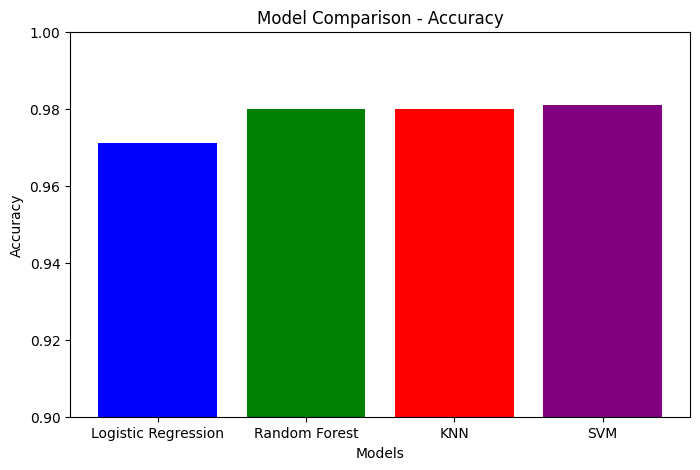

In [ ]:
# Plotting accuracy of each model
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

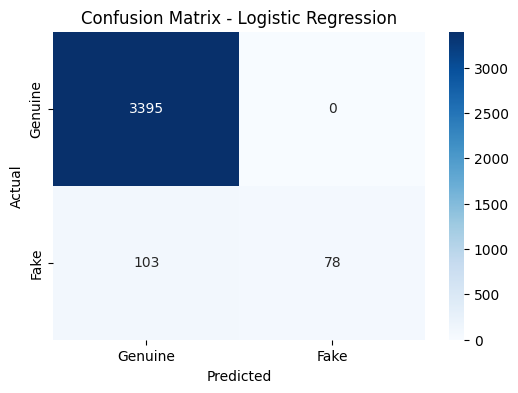

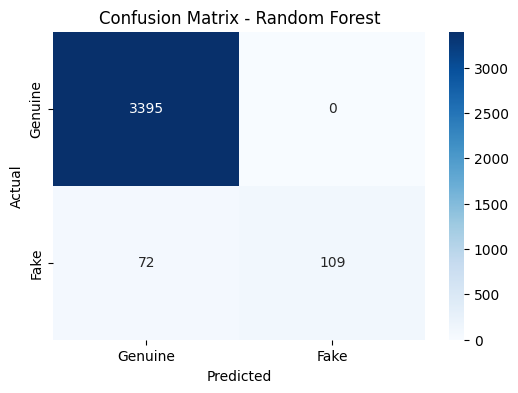

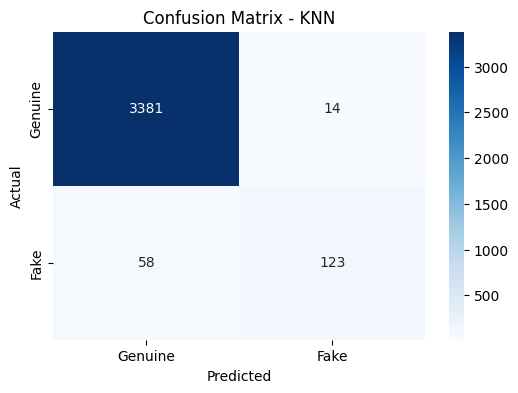

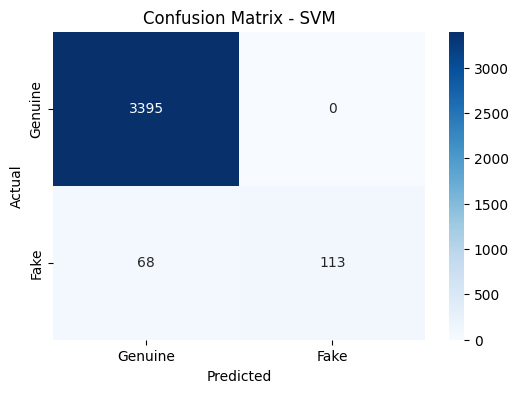

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fake'], yticklabels=['Genuine', 'Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()